In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]

In [3]:
def show(img):
    flip = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    flip = flip.astype('float32')
    flip /= np.max(flip)
    plt.imshow(flip)

In [4]:
HDR=0
if HDR:
    img = np.fromfile('CaptureHDR.raw', 'uint32')
    scale = np.max(img)/2**16
    img = img.astype('float32')
    img /= (scale) + 0.3
    img = img.astype('uint16')
else:
    img = np.fromfile('CaptureLinear.raw', 'uint16')

img = np.reshape(img, (1208, 1928))
cv2.imwrite('CaptureLinear.png', img)


True

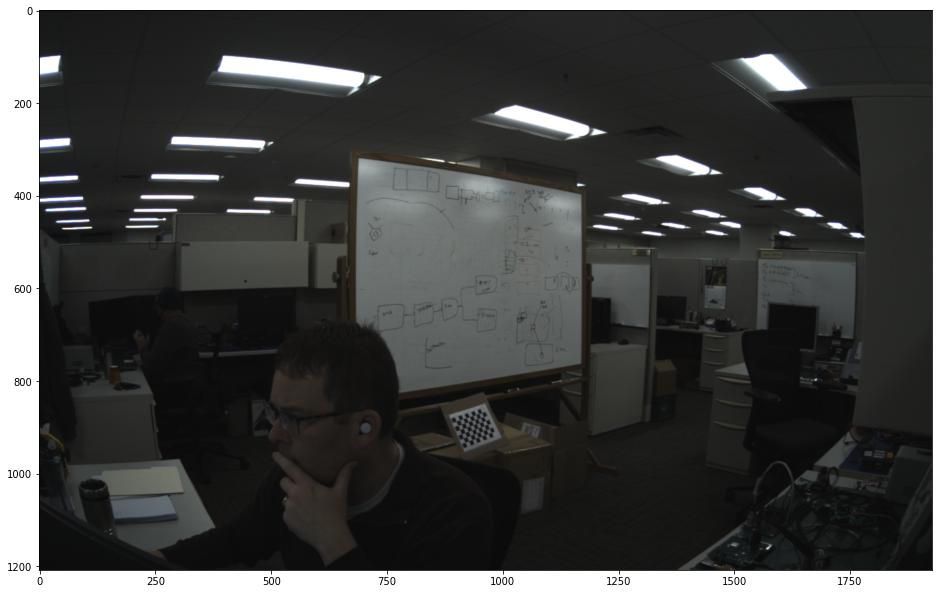

In [5]:
color = cv2.cvtColor(img, cv2.COLOR_BayerGB2BGR )
show(color)


4095.0 144.0
1.0 5.960409249494703e-11


[ WARN:0] global /home/nlbutts/projects/opencv/opencv/modules/core/src/matrix_expressions.cpp (1333) assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739


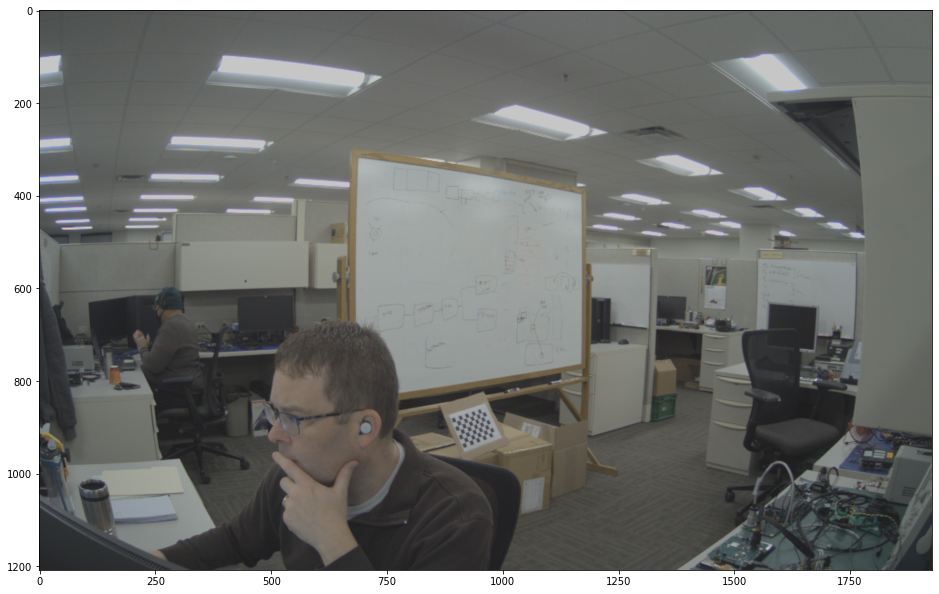

In [6]:
# HDR Mapping
tone = cv2.createTonemapDrago(1.5)
norm = color.astype('float32')
print(f'{np.max(norm)} {np.min(norm)}')
ldr = tone.process(norm)
print(f'{np.max(ldr)} {np.min(ldr)}')
ldr = np.clip(ldr, 0, 1)
show(ldr)

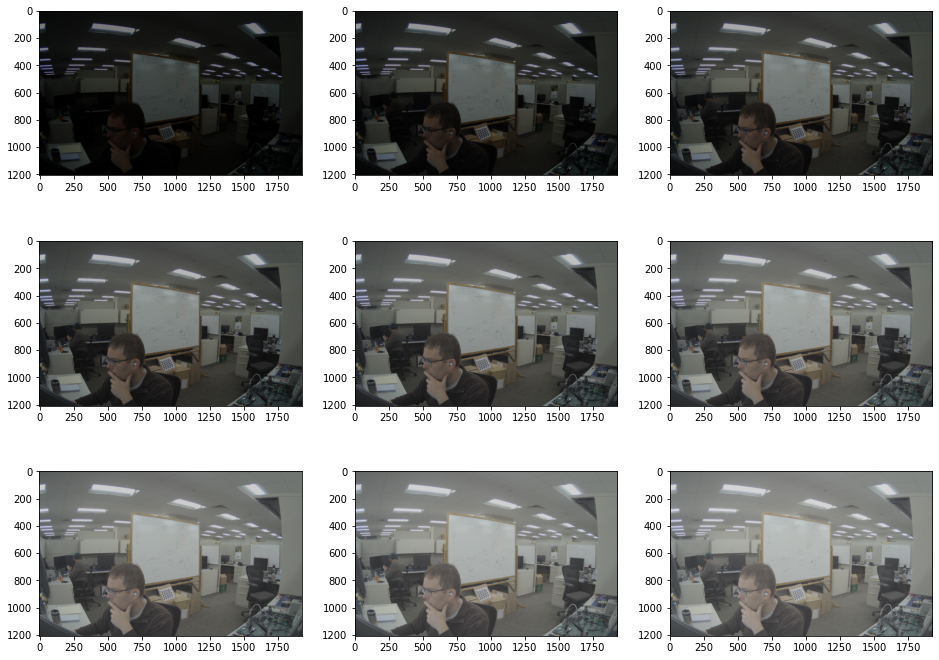

In [7]:
def show_sp(img, tone, axis):
    ldr = tone.process(img.copy())
    ldr = np.clip(ldr, 0, 1)
    flip = cv2.cvtColor(ldr, cv2.COLOR_BGR2RGB)
    flip = flip.astype('float32')
    flip /= np.max(flip)
    axis.imshow(flip)

f, ax = plt.subplots(3, 3)

tone = cv2.createTonemapDrago()
gamma = 0.5
#tonemap = [cv2.createTonemapMantiuk(), cv2.createTonemapReinhard(), cv2.createTonemapDrago()]
for row in ax:
    for a in row:
        tone.setGamma(gamma)
        gamma += 0.2
        show_sp(norm, tone, a)

